# Assignment 9
## Due June 26th
### names:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from scipy.stats import expon
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import kneighbors_graph
import networkx as nx

np.random.seed(42)

## Exercise 1

In [2]:
X, y = load_breast_cancer(return_X_y=True)
shuffled_idx = np.random.permutation(len(X))
X, y = X[shuffled_idx], y[shuffled_idx]
len_test = len(X) // 3 * 2
X_train, X_test = X[:len_test], X[len_test:]
y_train, y_test = y[:len_test], y[len_test:]

In [3]:
parameters = {'C':[0.01, 0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10, 100]}

# (a)
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.best_params_)

0.6020942408376964
{'C': 10, 'gamma': 0.01}


In [5]:
param_dist = {'C': expon(), 'gamma': expon()}

# (b)
clf = RandomizedSearchCV(svc, param_dist, n_iter=1000)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.best_params_)

### RESULTS AND COMMENTS
## n_iter = 100
# score: 0.6020942408376964
# best params: {'C': 0.4311187366281874, 'gamma': 1.2316222021432073}
## n_iter = 1000
# score: 0.900523560209424
# best params: {'C': 2.073274390815202, 'gamma': 0.0001884173060077152}

# If the n_iter=1000 is used, the result of score seems better than grid search.
# Because an exponential distribution can calculate more little times than normal one
# and this means that an exponential distribution is efficient than normal one,
# an exponential distribution is chosen instaed of normal one.

0.8795811518324608
{'C': 1.7214778108650661, 'gamma': 0.0015663312480417482}


## Exercise 2

### a)

In [6]:
def MDS(D, d):
    S = 0.5 * (np.square(D[0,:]) + np.square(D[:,0]) - np.square(D))
    # eigendecomposition
    u, s, vh = np.linalg.svd(S)
    return np.matmul(u[:,:d], np.sqrt(np.diag(s[:d])))

### b)

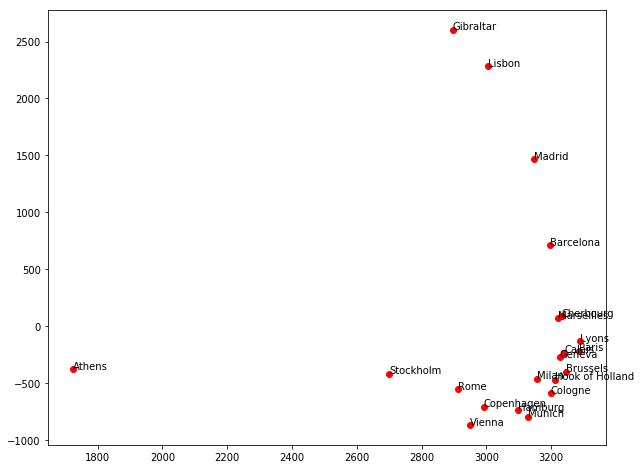

In [11]:
eurocity_dataframe = pd.read_csv('eurodist.csv', index_col=0, header=0)
citynames = eurocity_dataframe.columns
X_embedded = MDS(eurocity_dataframe.as_matrix(), 2)
plt.figure(figsize=(10, 8))
for i in range(21):
    plt.plot(X_embedded[i,0], X_embedded[i,1], 'or')
    plt.text(X_embedded[i,0], X_embedded[i,1], citynames[i])

### c)


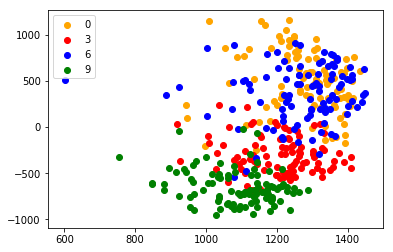

In [12]:
train_df = pd.read_csv('USPS.csv', sep='\t',)
X = train_df.drop(['Label'], axis=1).as_matrix()
y = train_df['Label'].as_matrix()
idx = np.any([y == 0, y == 3, y == 6, y == 9], axis=0)
X = X[idx]
y = y[idx]

uspsmds = MDS(euclidean_distances(X, X), 2)

fig, ax = plt.subplots()
color = ['orange' if l == 0 else 'red' if l == 3 else 'b' if l == 6 else 'g' for l in y]
cols = ['orange', 'red','blue','green']
for k in range(len(cols)):
    ax.scatter(uspsmds[y==k*3,0], uspsmds[y==k*3,1], c=cols[k], label=str(k*3))

ax.legend()
plt.show()

# Exercise 3)

### a)

In [13]:
def isomap(D, k, d):
    kG = kneighbors_graph(D, k, mode='distance')
    return MDS(kG.toarray(), d)

# b)

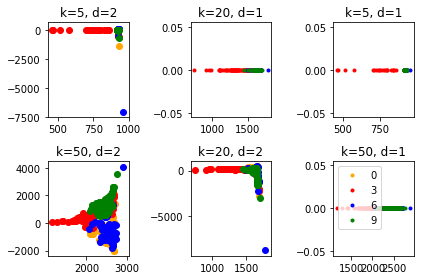

In [15]:
z = np.zeros(len(X))
k = [5, 20, 50]
cols = ['orange', 'red','blue','green']
fig = plt.figure()
ax = fig.add_subplot(2,3,1)
for i in range(len(cols)):
    l = isomap(euclidean_distances(X, X), 5, 2)
    ax.scatter(l[y==i*3,0], l[y==i*3,1], color=cols[i], label=str(i*3))
    ax.set_title('k=5, d=2')

ax = fig.add_subplot(2,3,3)
for i in range(len(cols)):
    l = isomap(euclidean_distances(X, X), 5, 1)
    ax.plot(l[y==i*3], z[y==i*3], '.', color=cols[i], label=str(i*3))
    ax.set_title('k=5, d=1')
    
ax = fig.add_subplot(2,3,5)
for i in range(len(cols)):
    l = isomap(euclidean_distances(X, X), 20, 2)
    ax.scatter(l[y==i*3,0], l[y==i*3,1], color=cols[i], label=str(i*3))
    ax.set_title('k=20, d=2')

ax = fig.add_subplot(2,3,2)
for i in range(len(cols)):
    l = isomap(euclidean_distances(X, X), 20, 1)
    ax.plot(l[y==i*3], z[y==i*3], '.', color=cols[i], label=str(i*3))
    ax.set_title('k=20, d=1')

ax = fig.add_subplot(2,3,4)
for i in range(len(cols)):
    l = isomap(euclidean_distances(X, X), 50, 2)
    ax.scatter(l[y==i*3,0], l[y==i*3,1], color=cols[i], label=str(i*3))
    ax.set_title('k=50, d=2')

ax = fig.add_subplot(2,3,6)
for i in range(len(cols)):
    l = isomap(euclidean_distances(X, X), 50, 1)
    ax.plot(l[y==i*3], z[y==i*3], '.', color=cols[i], label=str(i*3))
    ax.set_title('k=50, d=1')

ax.legend()
plt.tight_layout()
plt.show()